Importing all necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lib

Extract sound in .wav format using librosa

In [2]:
data,samplingRate = lib.load('harvard.wav',sr=None)
print(f'Sampling Rate : {samplingRate}')
print(f'Data Length : {len(data)}')

Sampling Rate : 44100
Data Length : 809508


Convert continous data into digital data

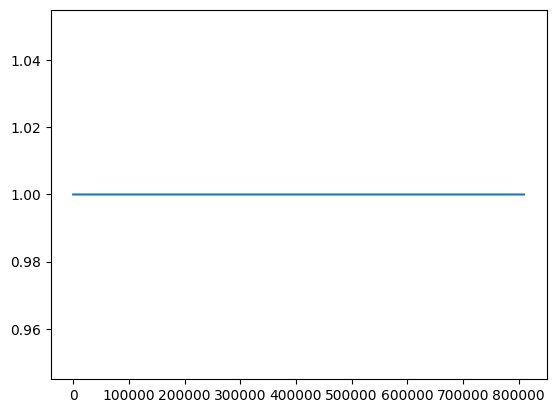

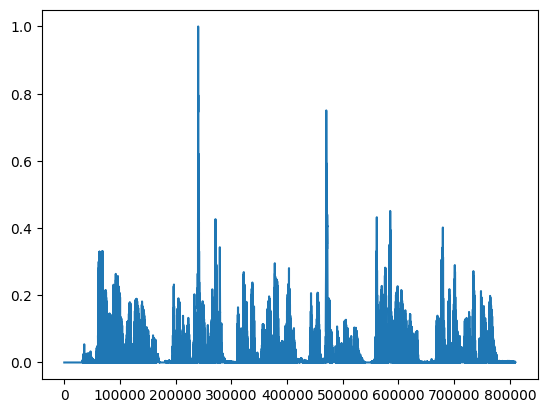

In [3]:
time = np.arange(0,len(data)/samplingRate,1/samplingRate)
AvgVoltage = 20*np.log10(np.mean(np.abs(data)))
Bandwidth = 2 * samplingRate
DigSource = np.where(np.abs(data)<=AvgVoltage/2,0,1)
plt.figure()
plt.plot(DigSource)
plt.figure()
plt.plot(np.abs(data))
plt.show()